<a href="https://colab.research.google.com/github/ashaoluayanfe/data-science-and-analytics/blob/main/Pima_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease Using Machine Learning
This notebook looks into using various Python-based machine and data science libraries in an attempt to build a machine learning capable  diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. All patients here are females at least 21 years old of Pima Indian heritage.

* We're going to take the following approach:
  
  1. Problem definition
  2. Data
  3. Evaluation
  4. Features
  5. Modelling
  6. Experimentation

## **1. Problem Definition**
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## **2. Data**
Dataset source:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

## **3. Evaluation**
> If we can reach 85% accuracy at predicting whether or not a patient has diabetes during the proof of concept, we'll pursue the project.

## **4. Features**
1. Pregnancies : Number of times pregnant
2. Glucose: Oral Glucose Tolerance Test result.
> The glucose tolerance test is a lab test to check how your body moves sugar from the blood into tissues like muscle and fat. The test is often used to diagnose diabetes.
3. BloodPressure: Diastolic Blood Pressure values in (mm Hg).
> The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.
This is what your diastolic blood pressure number means:
* Normal: Lower than 80
* Stage 1 hypertension: 80–89
* Stage 2 hypertension: 90 or more
* Hypertensive crisis: 120 or more
4. SkinThickness: Triceps skin fold thickness in (mm).It is use in predicting  the total amount of body fat. 
>Skinfold thickness, so that a prediction of the total amount of body fat can be made. The triceps skinfold is necessary for calculating the upper arm muscle circumference. Its thickness gives information about the fat reserves of the body, whereas the calculated muscle mass gives information about the protein reserves.
For adults, the standard normal values for triceps skinfolds are 2.5mm (men) or about 20% fat; 18.0mm (women) or about 30% fat. Measurement half, or less, of these values represent about the 15th percentile and can be considered as either borderline, or fat depleted. Values over 20mm (men) and 30mm (women) represent about the 85th percentile, and can be considered.
5. Insulin: 2-Hour serum insulin (mu U/ml)
>Insulin is a hormone that helps move blood sugar, known as glucose, from your bloodstream into your cells.
2-hour Serum Insulin: Greater than 150 mu U/ml relates to insulin therapy
Insulin therapy is a critical part of treatment for people with type 1 diabetes and also for many with type 2 diabetes. The goal of insulin therapy is to keep your blood sugar levels within a target range.
6. BMI: Body mass index
> The Body Mass Index (BMI) provides a simple, yet accurate method of assessing whether a patient is at risk from either over-or-underweight.
* Underweight < 18.5
* Normal weight: 18.5-24.5
* Overweight: 25-29.9
* Obesity (class I) : 30-34.9
* Obesity (class II) : 35-39.9
* Obsesity (class III): > 40.0
7. DiabetesPedigreeFunction: It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus.
8. Age: Age in years
9. Outcome: Class 1 indicates person having diabetes and 0 indicates other.

## **5. Modelling**

### **5.1 Exploratory Data Analysis**

In [ ]:
# import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load data
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml_dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

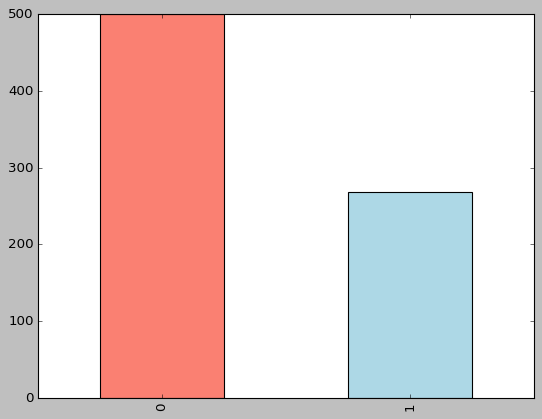

In [ ]:
plt.style.use('classic')
df['Outcome'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


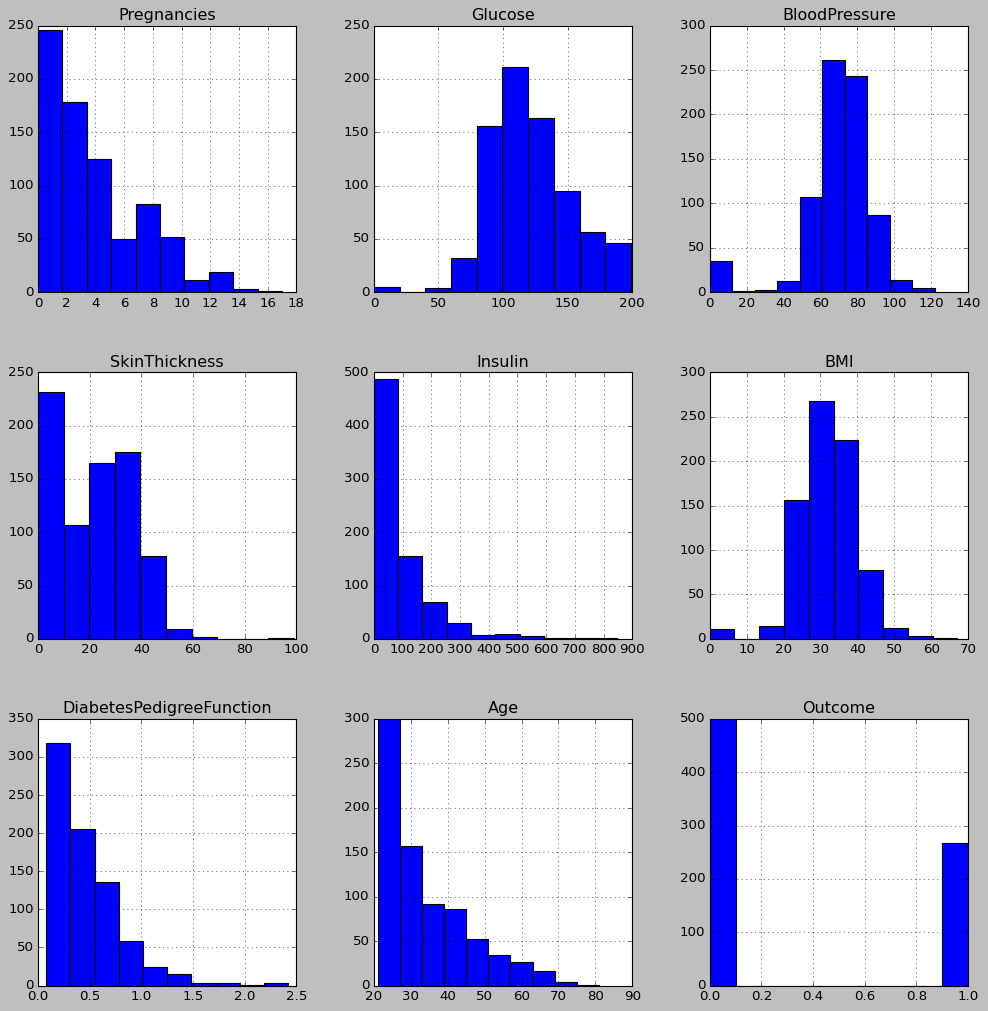

In [ ]:
histo= df.hist(figsize=(15,15))

In [ ]:
# Check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **5.2 Correlation Matrix**

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


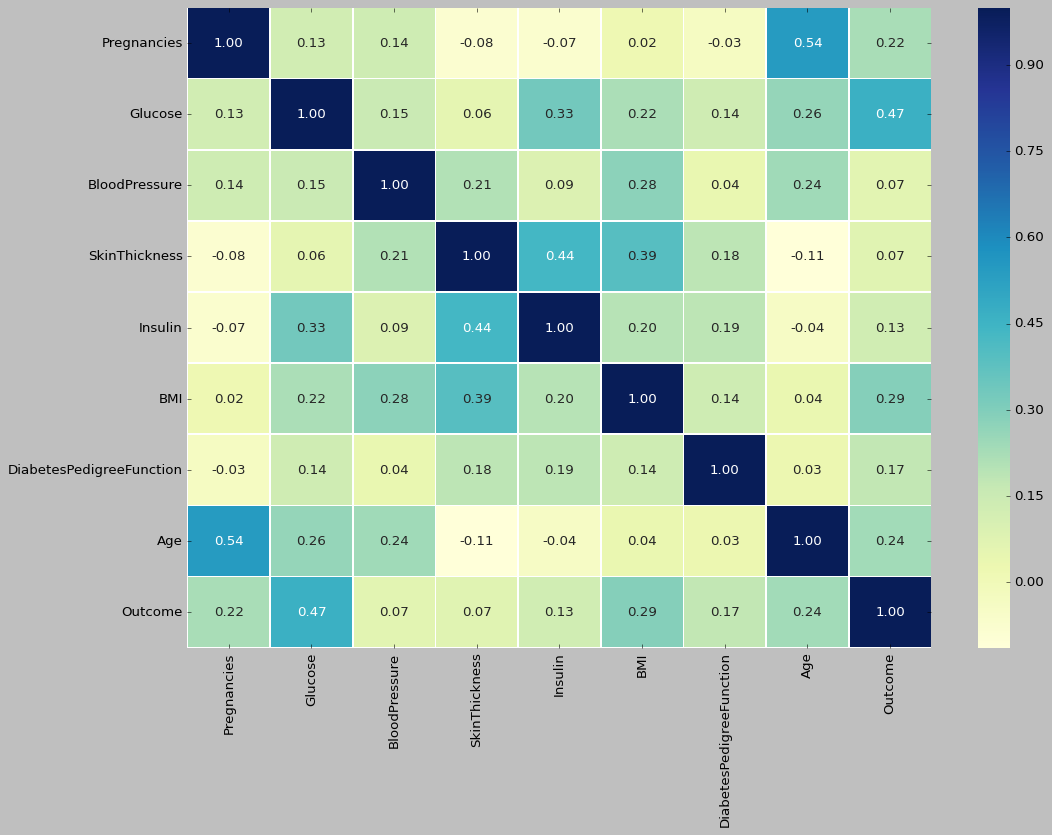

In [ ]:
## Visualizing correlation matrix using seaborn heatmap
corr_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

### **5.3 Preparing Data for Machine Learning**




In [ ]:
# Split data into X and Y
X= df.drop('Outcome', axis = 1)
y= df['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2)


### **5.4 Building a Machine Learning Model**
* Four models will be used:
  1. Logistic regression
  2. K-Nearest Neighbours classifier
  3. Random Forest Classifier
  4. SVM

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SVM' : SVC(kernel='linear')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  '''''
  Fits and evaluate given machine learning models
  models: A dictionary of different Scikit-Learn machine learning models
  X_train_norm: Normalized training data(no labels)
  X_test_norm: Normalized test data(no labels)
  y_train: Training labels
  y_test: Test labels

  '''''
  # set random seed
  np.random.seed(42)

  # Make a dictionary to keep update scores
  model_scores={}

  # Loop through the models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    #Evaluate the model and append its score to model_scores
    model_scores[name]= model.score(X_test, y_test)
  return model_scores

 

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_scores

{'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207,
 'SVM': 0.7532467532467533}

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)

In [ ]:
Accuracy

0.7532467532467533

### **5.5 Evaluating  Machine Learning Model**
The following metrics will be used:     
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score





#### **5.5.1 ROC curve and AUC**


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


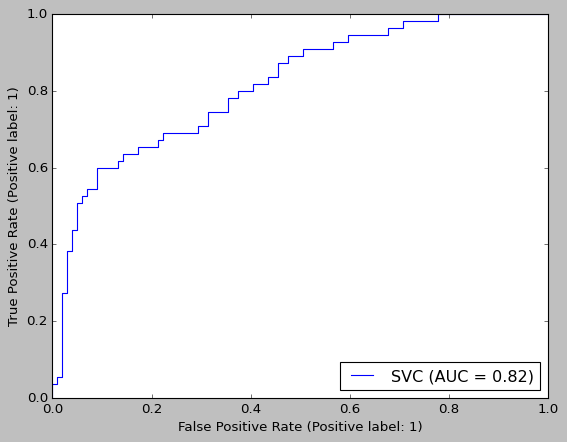

In [ ]:
plot_roc_curve(clf, X_test, y_test);


#### **5.5.2 Confusion Matrix** 

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

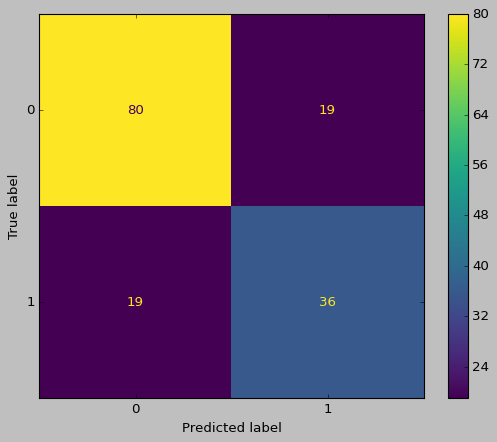

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=clf.classes_)
disp.plot()
plt.show()

#### **5.5.3 Classification Report**

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### **5.5.4 Feature Importance**

In [ ]:
# Check coef_
clf.coef_

array([[ 0.06011635,  0.0279392 , -0.01250348, -0.00099248, -0.00128999,
         0.07287321,  0.41715989,  0.02411532]])

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.0241153220963497,
 'BMI': 0.07287321048944051,
 'BloodPressure': -0.01250348092207787,
 'DiabetesPedigreeFunction': 0.4171598888713075,
 'Glucose': 0.027939199875618215,
 'Insulin': -0.0012899921830467065,
 'Pregnancies': 0.060116346325116865,
 'SkinThickness': -0.0009924768365863201}

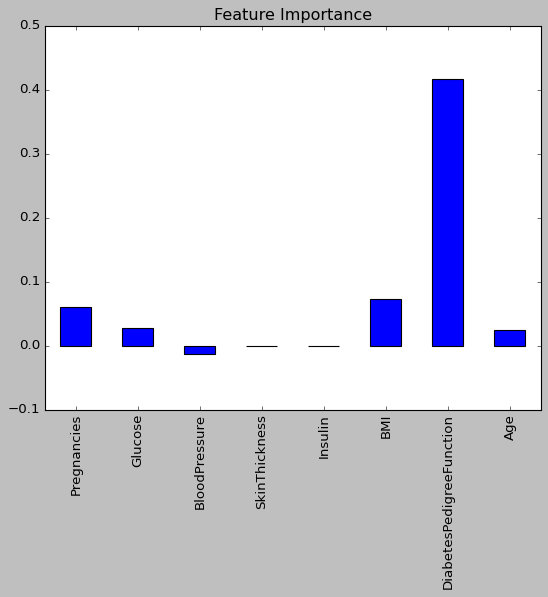

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

## 6. Making predictions

In [ ]:
input_data = (1,85,66,29,0,26.6, 0.351,31)

input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)

pred = clf.predict(input_data)

if (pred[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')



The person is not diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


## 7. Saving the Trained Model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# loading the save model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)

pred = clf.predict(input_data)
print(pred)

if (pred[0] == 1):
  print('The person is diabetic')
else:
  print('The person is not diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
